In [1]:
!pip install pandas

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
from sklearn.ensemble import IsolationForest

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [8]:
import seaborn as sns

In [6]:
df = pd.read_csv('records_v2.csv')

In [7]:
print(df.head())

    id  reading      reading_time  Fuel Volume (L)
0  1.0    23.02  11/20/2025 17:17            12.63
1  2.0    23.22  11/20/2025 17:17            12.46
2  3.0    23.22  11/20/2025 17:18            12.46
3  4.0    23.22  11/20/2025 17:18            12.46
4  5.0    23.22  11/20/2025 17:18            12.46


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1225 non-null   float64
 1   reading          1223 non-null   float64
 2   reading_time     1225 non-null   object 
 3   Fuel Volume (L)  1222 non-null   float64
dtypes: float64(3), object(1)
memory usage: 38.5+ KB
None


In [8]:
print(df.describe())

                id      reading  Fuel Volume (L)
count  1225.000000  1223.000000      1222.000000
mean    606.946122    28.101635         8.281236
std     345.994669     3.496746         2.992941
min       1.000000    22.860000         0.000000
25%     307.000000    25.380000         7.130000
50%     613.000000    28.760000         7.720000
75%     905.000000    29.450000        10.610000
max    1201.000000    37.780000        12.780000


In [9]:
print(df.isnull().sum())

id                 3
reading            5
reading_time       3
Fuel Volume (L)    6
dtype: int64


In [10]:
df['reading_time'] = pd.to_datetime(df['reading_time'])

In [11]:
df = df.sort_values('reading_time')

In [12]:
df.dropna(subset=['Fuel Volume (L)', 'reading', 'reading_time'], inplace=True)

In [13]:
df = df.sort_values('reading_time')

In [14]:
df['volume_diff'] = df['Fuel Volume (L)'].diff()

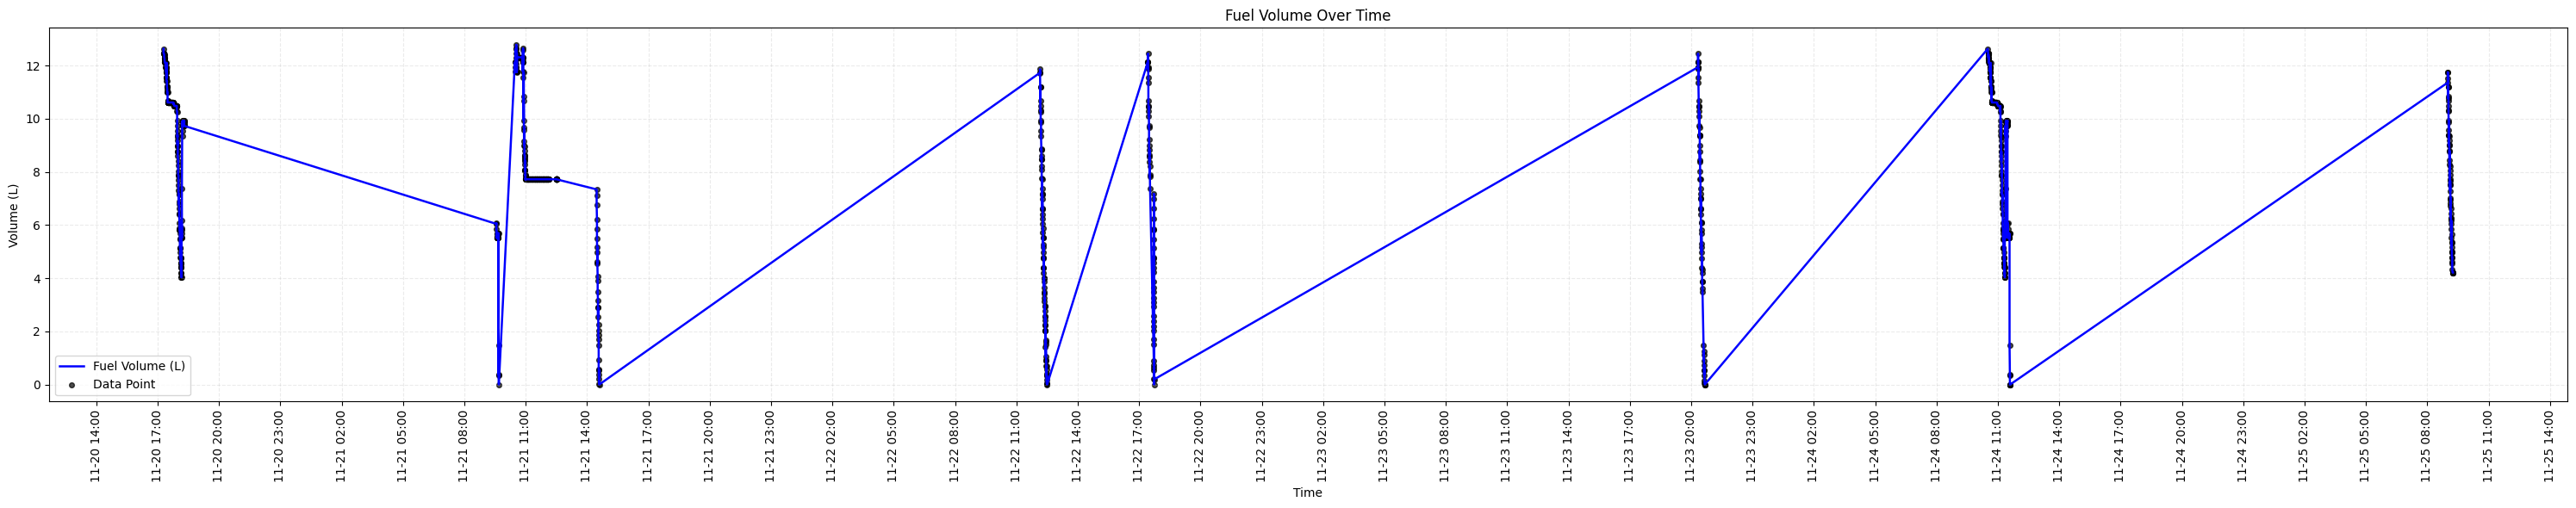

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(30, 6))  # Wider for dense time axis

# Scatter and line for clarity
plt.plot(df['reading_time'], df['Fuel Volume (L)'], color='blue', label='Fuel Volume (L)', linewidth=1.8)
plt.scatter(df['reading_time'], df['Fuel Volume (L)'], color='black', s=17, label='Data Point', alpha=0.7)

plt.title('Fuel Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume (L)')
plt.legend()

# Major ticks every 3 hours, show hour+minute+date
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', alpha=0.25)
plt.tight_layout()

plt.show()

In [19]:
df['volume_diff'] = df['Fuel Volume (L)'].diff()

In [20]:
print(df)

          id  reading        reading_time  Fuel Volume (L)  volume_diff
0        1.0    23.02 2025-11-20 17:17:00            12.63          NaN
1        2.0    23.22 2025-11-20 17:17:00            12.46        -0.17
2        3.0    23.22 2025-11-20 17:18:00            12.46         0.00
3        4.0    23.22 2025-11-20 17:18:00            12.46         0.00
4        5.0    23.22 2025-11-20 17:18:00            12.46         0.00
...      ...      ...                 ...              ...          ...
1220  1197.0    32.84 2025-11-25 09:14:00             4.23        -0.10
1221  1198.0    32.86 2025-11-25 09:14:00             4.21        -0.02
1222  1199.0    32.86 2025-11-25 09:14:00             4.21         0.00
1223  1200.0    32.86 2025-11-25 09:14:00             4.21         0.00
1224  1201.0    32.86 2025-11-25 09:15:00             4.21         0.00

[1222 rows x 5 columns]


In [42]:
# =========================
# 5. Isolation Forest (richer: volume_diff + rolling stats)
# =========================
# Build multivariate feature set (only rows where all exist)
feature_cols = ['volume_diff', 'rolling_mean', 'rolling_std']
features = df[feature_cols].dropna()

iso_model = IsolationForest(contamination=0.01, random_state=42)
iso_model.fit(features)

# Predict: 1 = normal, -1 = anomaly
iso_labels = iso_model.predict(features)

# Save to DataFrame
df.loc[features.index, 'anomaly_flag'] = iso_labels

# Extract anomalies
anomalies = df[df['anomaly_flag'] == -1]
print("\nIsolation Forest anomalies (multi‑feature):")
print(anomalies[['reading_time', 'Fuel Volume (L)',
                 'volume_diff', 'rolling_mean', 'rolling_std']])



Isolation Forest anomalies (multi‑feature):
            reading_time  Fuel Volume (L)  volume_diff  rolling_mean  \
256  2025-11-21 09:40:00             0.37        -5.30         4.554   
254  2025-11-21 09:40:00             5.67         5.30         4.584   
255  2025-11-21 09:40:00             1.48        -4.19         3.776   
259  2025-11-21 10:28:00            12.13        12.13         3.926   
703  2025-11-22 12:09:00            11.73        11.73         2.570   
708  2025-11-22 12:10:00            10.66        -1.20         9.192   
782  2025-11-22 17:25:00            12.12        12.12         2.536   
837  2025-11-22 17:43:00             0.88        -6.48         6.428   
821  2025-11-22 17:43:00             3.88         3.00         5.642   
808  2025-11-22 17:43:00             7.17         3.29         5.498   
845  2025-11-23 20:20:00            11.94        11.75         3.854   
901  2025-11-24 10:30:00            12.63        12.63         2.534   
1166 2025-11-25 09:

In [43]:
df['prev_fuel_volume'] = df['Fuel Volume (L)'].shift(1)

In [44]:
# A refill is legitimate if previous volume == 0 and the current volume is large
df['legit_refill'] = (df['prev_fuel_volume'] == 0) & (df['volume_diff'] > 2)  # Adjust threshold as needed

In [45]:
df['anomaly_flag_corrected'] = df['anomaly_flag']  # Copy initial model output
df.loc[df['legit_refill'], 'anomaly_flag_corrected'] = 1  # Set to "normal"

In [46]:
anomalies_corrected = df[df['anomaly_flag_corrected'] == -1]
print("Corrected Detected anomalies:")
print(anomalies_corrected[['reading_time', 'Fuel Volume (L)', 'volume_diff', 'rolling_mean', 'rolling_std']])

Corrected Detected anomalies:
           reading_time  Fuel Volume (L)  volume_diff  rolling_mean  \
256 2025-11-21 09:40:00             0.37        -5.30         4.554   
254 2025-11-21 09:40:00             5.67         5.30         4.584   
255 2025-11-21 09:40:00             1.48        -4.19         3.776   
708 2025-11-22 12:10:00            10.66        -1.20         9.192   
837 2025-11-22 17:43:00             0.88        -6.48         6.428   
821 2025-11-22 17:43:00             3.88         3.00         5.642   
808 2025-11-22 17:43:00             7.17         3.29         5.498   
845 2025-11-23 20:20:00            11.94        11.75         3.854   

     rolling_std  
256     2.340306  
254     2.356688  
255     2.632030  
708     5.161102  
837     3.115938  
821     3.175283  
808     3.062159  
845     4.843530  


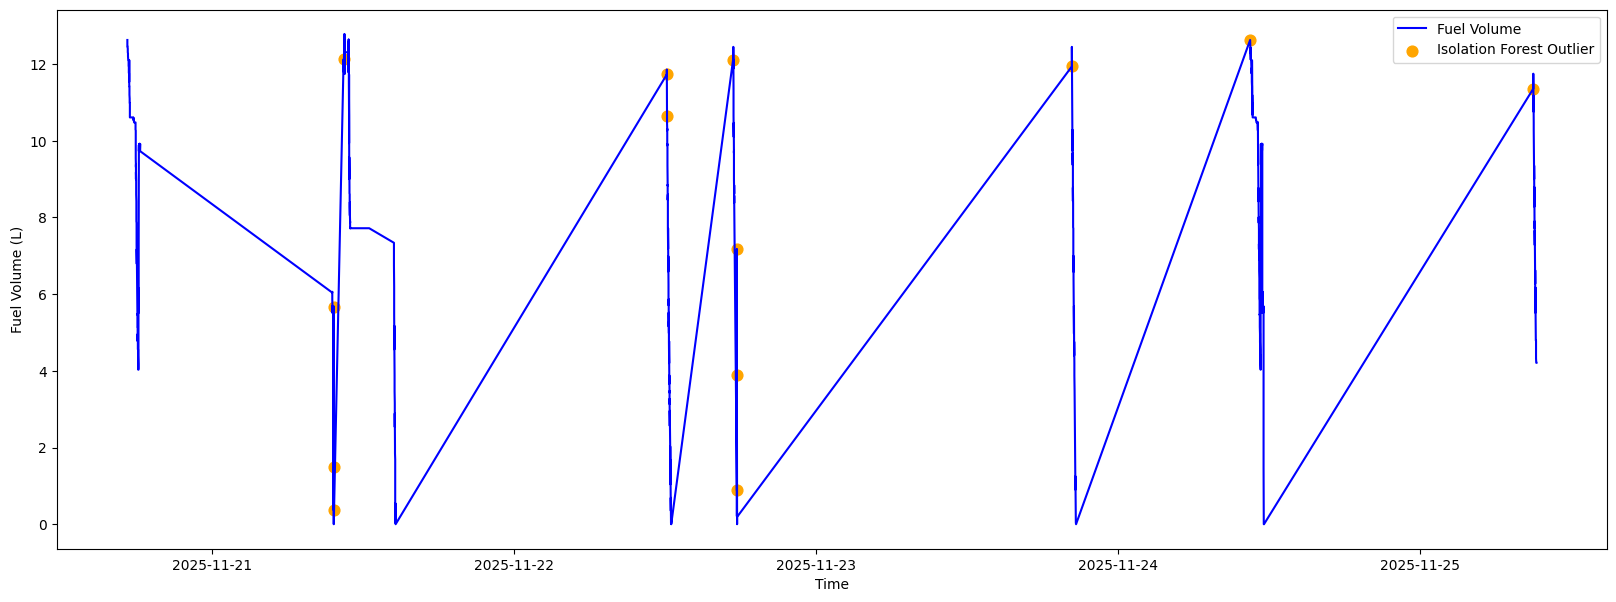

In [35]:
# =========================
# 6. Plot fuel volume with Isolation Forest anomalies
# =========================
plt.figure(figsize=(20, 7))

# Full fuel volume curve
plt.plot(df['reading_time'], df['Fuel Volume (L)'],
         label='Fuel Volume', color='blue')

# Highlight anomalies from multivariate Isolation Forest
plt.scatter(anomalies['reading_time'], anomalies['Fuel Volume (L)'],
            color='orange', s=60, label='Isolation Forest Outlier')

plt.xlabel('Time')
plt.ylabel('Fuel Volume (L)')
plt.legend()
plt.show()


In [6]:
df = pd.read_csv('records_v2.csv')

df['Fuel Volume (L)'] = pd.to_numeric(df['Fuel Volume (L)'], errors='coerce')
df['reading_time'] = pd.to_datetime(df['reading_time'], errors='coerce')
df = df.sort_values(['reading_time', 'id'])

# Core feature: change in fuel volume
df['volume_diff'] = df['Fuel Volume (L)'].diff()

# Previous volume (for business rule)
df['prev_fuel_volume'] = df['Fuel Volume (L)'].shift(1)

# Feature matrix (you can add more columns here)
feature_cols = ['volume_diff']
X = df[feature_cols].dropna()

In [7]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(X)                       # learn "normal" behaviour
df.loc[X.index, 'iso_flag'] = iso.predict(X)   # 1 = normal, -1 = anomaly


In [8]:
# Refill immediately after empty tank -> treat as normal even if model said anomaly
legit_refill = (df['prev_fuel_volume'] == 0) & (df['volume_diff'] > 2)
df.loc[legit_refill, 'iso_flag'] = 1


In [9]:
iso_anomalies = df[df['iso_flag'] == -1][['id','reading_time','Fuel Volume (L)',
                                          'volume_diff','prev_fuel_volume']]
print(iso_anomalies)


          id        reading_time  Fuel Volume (L)  volume_diff  \
207    208.0 2025-11-20 18:12:00             9.36         1.99   
232    233.0 2025-11-21 09:34:00             6.04        -3.85   
255    256.0 2025-11-21 09:40:00             1.48        -4.19   
1108  1085.0 2025-11-24 11:22:00             9.83         2.46   
1133  1110.0 2025-11-24 11:28:00             6.19        -3.70   
1156  1133.0 2025-11-24 11:34:00             2.16        -3.51   

      prev_fuel_volume  
207               7.37  
232               9.89  
255               5.67  
1108              7.37  
1133              9.89  
1156              5.67  


In [15]:
import numpy as np

# Make sure volume_diff and prev_fuel_volume exist
df['volume_diff'] = df['Fuel Volume (L)'].diff()
df['prev_fuel_volume'] = df['Fuel Volume (L)'].shift(1)

def classify_anomaly(row, big_jump=2.0):
    if row['iso_flag'] != -1:      # normal points
        return np.nan
    if row['volume_diff'] <= -big_jump:
        return 'Sudden large drop'
    elif row['volume_diff'] >= big_jump and row['prev_fuel_volume'] != 0:
        return 'Unexpected refill'
    elif abs(row['volume_diff']) < big_jump and row['prev_fuel_volume'] != 0:
        return 'Unusual small change'
    else:
        return 'Refill after empty / ignore'

df['anomaly_type'] = df.apply(classify_anomaly, axis=1)


In [16]:
import pandas as pd

# Ensure df is sorted correctly
df = df.sort_values(['reading_time', 'id']).reset_index(drop=True)

# Get indices of anomaly points
anomaly_idx = df.index[df['iso_flag'] == -1]  # or 'svm_flag'

records_list = []

for i in anomaly_idx:
    prev_row = df.iloc[i-1] if i-1 >= 0 else None
    curr_row = df.iloc[i]
    next_row = df.iloc[i+1] if i+1 < len(df) else None

    if prev_row is not None:
        records_list.append({
            'relation': 'Previous',
            'anomaly_id': curr_row['id'],
            'id': prev_row['id'],
            'reading_time': prev_row['reading_time'],
            'Fuel Volume (L)': prev_row['Fuel Volume (L)']
        })

    records_list.append({
        'relation': 'Anomaly',
        'anomaly_id': curr_row['id'],
        'id': curr_row['id'],
        'reading_time': curr_row['reading_time'],
        'Fuel Volume (L)': curr_row['Fuel Volume (L)']
    })

    if next_row is not None:
        records_list.append({
            'relation': 'Next',
            'anomaly_id': curr_row['id'],
            'id': next_row['id'],
            'reading_time': next_row['reading_time'],
            'Fuel Volume (L)': next_row['Fuel Volume (L)']
        })

context_df = pd.DataFrame(records_list)

# Set custom order for relation and sort
relation_order = pd.CategoricalDtype(
    categories=['Previous', 'Anomaly', 'Next'],
    ordered=True
)
context_df['relation'] = context_df['relation'].astype(relation_order)

context_df = context_df.sort_values(['anomaly_id', 'relation'])
print(context_df)

def highlight_anomaly(row):
    styles = [''] * len(row)
    if row['relation'] == 'Anomaly':
        for i in range(len(row)):
            styles[i] = 'background-color: yellow; color: black;'
    return styles

context_df.style.apply(highlight_anomaly, axis=1)




    relation  anomaly_id      id        reading_time  Fuel Volume (L)
0   Previous       208.0   207.0 2025-11-20 18:11:00             7.37
1    Anomaly       208.0   208.0 2025-11-20 18:12:00             9.36
2       Next       208.0   209.0 2025-11-20 18:12:00             9.73
3   Previous       233.0   232.0 2025-11-20 18:18:00             9.89
4    Anomaly       233.0   233.0 2025-11-21 09:34:00             6.04
5       Next       233.0   234.0 2025-11-21 09:34:00             6.06
6   Previous       256.0   255.0 2025-11-21 09:40:00             5.67
7    Anomaly       256.0   256.0 2025-11-21 09:40:00             1.48
8       Next       256.0   257.0 2025-11-21 09:40:00             0.37
9   Previous      1085.0  1084.0 2025-11-24 11:22:00             7.37
10   Anomaly      1085.0  1085.0 2025-11-24 11:22:00             9.83
11      Next      1085.0  1086.0 2025-11-24 11:22:00             9.73
12  Previous      1110.0  1109.0 2025-11-24 11:28:00             9.89
13   Anomaly      11

,relation,anomaly_id,id,reading_time,Fuel Volume (L)
0,Previous,208.000000,207.000000,2025-11-20 18:11:00,7.370000
1,Anomaly,208.000000,208.000000,2025-11-20 18:12:00,9.360000
2,Next,208.000000,209.000000,2025-11-20 18:12:00,9.730000
3,Previous,233.000000,232.000000,2025-11-20 18:18:00,9.890000
4,Anomaly,233.000000,233.000000,2025-11-21 09:34:00,6.040000
5,Next,233.000000,234.000000,2025-11-21 09:34:00,6.060000
6,Previous,256.000000,255.000000,2025-11-21 09:40:00,5.670000
7,Anomaly,256.000000,256.000000,2025-11-21 09:40:00,1.480000
8,Next,256.000000,257.000000,2025-11-21 09:40:00,0.370000
9,Previous,1085.000000,1084.000000,2025-11-24 11:22:00,7.370000


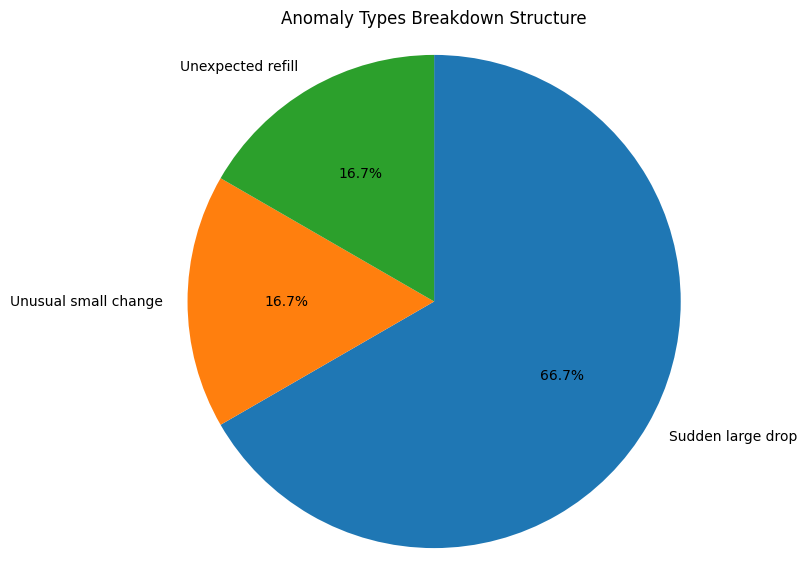

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

anomaly_df = df[df['iso_flag'] == -1]
type_counts = anomaly_df['anomaly_type'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(type_counts.values,
        labels=type_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False)
plt.title('Anomaly Types Breakdown Structure')
plt.axis('equal')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

mask = df['true_anomaly'].notnull() & df['iso_flag'].notnull()

y_true = df.loc[mask, 'true_anomaly'].astype(int)
y_pred = (df.loc[mask, 'iso_flag'] == -1).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred,
                            target_names=['Normal', 'Anomaly']))


NameError: name 'df' is not defined